In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# 데이터 준비

In [2]:
# 카카오 주가 데이터
kakao1 = pd.read_csv('./data/주가_train_data.csv', index_col=0)
kakao2 = pd.read_csv('./data/주가_test_data.csv', index_col=0)

kakao = pd.concat((kakao1,kakao2), ignore_index=True)
kakao

,Date,Open,High,Low,Close,Adj.Close,Volume,일일종가차이
0,2020-01-02,30800.0,30900,30400.0,30500.0,30473.498047,1205235,-200
1,2020-01-03,30700.0,31000,30200.0,30500.0,30473.498047,1574240,0
2,2020-01-06,30100.0,31000,30000.0,30900.0,30873.152344,1968575,400
3,2020-01-07,31000.0,32000,30900.0,32000.0,31972.195313,4200930,1100
4,2020-01-08,31700.0,32400,31300.0,31900.0,31872.283203,4258095,-100
...,...,...,...,...,...,...,...,...
568,2022-04-21,95100.0,95100,93100.0,93600.0,93600.000000,1809576,-1500
569,2022-04-22,92200.0,92400,91400.0,92000.0,92000.000000,1553904,-1600
570,2022-04-25,90400.0,91600,89600.0,89700.0,89700.000000,1511408,-2300
571,2022-04-26,89800.0,91700,89700.0,90200.0,90200.000000,1368258,500


In [3]:
# 감성점수 데이터
con = pd.read_csv('./data/합친파일.csv', index_col=0)
con

,date,text,score,senti
0,2020.01.01,네이버카카오 작년 연매출 사상최대,1,1
1,2020.01.01,한진네이버카카오두산…국민연금 수익률 ‘효자’,2,1
2,2020.01.01,백브리핑 돈보다 금배지,1,1
3,2020.01.01,게임위 GO 애플 STOP19금 게임 이중검열 논란,-2,-1
4,2020.01.01,달린 거리만큼 보험료 내는 ‘디지털 車보험’ 나온다,0,0
...,...,...,...,...
143178,2022.04.12,전세계 매출 위 앱 개발사에 기업 곳 엔씨 넷마블 카카오 포함 다음뉴...,1,1
143179,2022.04.12,지금 모 행 간식쿠폰 준대 커피부터 치킨까지 커피 편의점 치킨 쿠폰 랜덤...,-1,-1
143180,2022.04.12,충격 국민연금 중국에 조원 투자 기업에 조원 투자한 국민연금...,-2,-1
143181,2022.04.12,구글 애플의 갑질은 금지해야 하지만 네이버 카카오의 갑질은 그대로 놔두자고 주장하...,1,1


In [4]:
date_list=[]
# date날짜 형식이 kakao와 달라서 형식 수정
for i in con['date']:
    j=i.rstrip('.')
    k=j.replace('.','-')
    date_list.append(k)

In [5]:
con['date']=date_list
con=con.rename(columns={'date':'Date'})

In [8]:
con

,Date,text,score,senti
0,2020-01-01,네이버카카오 작년 연매출 사상최대,1,1
1,2020-01-01,한진네이버카카오두산…국민연금 수익률 ‘효자’,2,1
2,2020-01-01,백브리핑 돈보다 금배지,1,1
3,2020-01-01,게임위 GO 애플 STOP19금 게임 이중검열 논란,-2,-1
4,2020-01-01,달린 거리만큼 보험료 내는 ‘디지털 車보험’ 나온다,0,0
...,...,...,...,...
143178,2022-04-12,전세계 매출 위 앱 개발사에 기업 곳 엔씨 넷마블 카카오 포함 다음뉴...,1,1
143179,2022-04-12,지금 모 행 간식쿠폰 준대 커피부터 치킨까지 커피 편의점 치킨 쿠폰 랜덤...,-1,-1
143180,2022-04-12,충격 국민연금 중국에 조원 투자 기업에 조원 투자한 국민연금...,-2,-1
143181,2022-04-12,구글 애플의 갑질은 금지해야 하지만 네이버 카카오의 갑질은 그대로 놔두자고 주장하...,1,1


In [6]:
# 일자별 감성점수 평균
nalza_score=con['score'].groupby(con['Date']).mean().to_frame()

In [7]:
kanal=kakao.merge(nalza_score, on='Date', how='inner')
kanal

,Date,Open,High,Low,Close,Adj.Close,Volume,일일종가차이,score
0,2020-01-02,30800.0,30900,30400.0,30500.0,30473.498047,1205235,-200,1.600000
1,2020-01-03,30700.0,31000,30200.0,30500.0,30473.498047,1574240,0,-0.900000
2,2020-01-06,30100.0,31000,30000.0,30900.0,30873.152344,1968575,400,0.250000
3,2020-01-07,31000.0,32000,30900.0,32000.0,31972.195313,4200930,1100,-0.625000
4,2020-01-08,31700.0,32400,31300.0,31900.0,31872.283203,4258095,-100,-0.312500
...,...,...,...,...,...,...,...,...,...
568,2022-04-21,95100.0,95100,93100.0,93600.0,93600.000000,1809576,-1500,1.118156
569,2022-04-22,92200.0,92400,91400.0,92000.0,92000.000000,1553904,-1600,0.050633
570,2022-04-25,90400.0,91600,89600.0,89700.0,89700.000000,1511408,-2300,0.036517
571,2022-04-26,89800.0,91700,89700.0,90200.0,90200.000000,1368258,500,-0.094406


# 단순회귀분석
#### 독립변수 : score
#### 종속변수 : 일일종가차이
#### 감성점수는 일일종가차이와 상관성을 갖고 있는지 알아보기 위함

In [9]:
X_data = kanal[['score']] # 독립변수
y_target = kanal['일일종가차이'] # 종속변수

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, train_size=0.7, random_state=156)

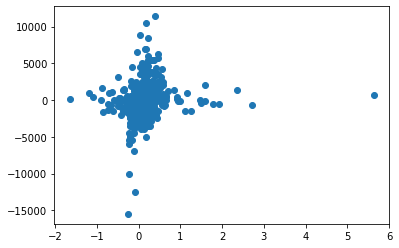

In [10]:
plt.scatter(X_data,y_target)

In [11]:
X_data.shape, y_target.shape

((573, 1), (573,))

In [12]:
line_fitter = LinearRegression() # 빈 선형회귀모델 생성
line_fitter.fit(X_data, y_target)

LinearRegression()

In [13]:
y_predict = line_fitter.predict(X_test)
y_predict
len(y_predict)

172

In [14]:
# 회귀계수 : 독립변수의 값에 영향을 미치는 것
line_fitter.coef_

array([917.58474035])

In [15]:
# 절편
line_fitter.intercept_

-16.324494995320777

In [16]:
# 단순 선형회귀 시각화
line_fitter.predict(X_data) #: 생성변수 X에 대한 모델의 예측값

array([ 1.45181109e+03, -8.42150761e+02,  2.13071690e+02, -5.89814958e+02,
       -3.03069726e+02,  1.05419104e+03, -1.63244950e+01, -1.08082969e+02,
       -5.58533660e+02,  4.42467875e+02, -6.22037320e+01,  1.61493727e+03,
        3.70026975e+02,  5.57165968e+02,  5.67593067e+02,  8.40087929e+02,
       -1.69255285e+02, -1.53033932e+03, -1.53962206e+02,  2.89537085e+02,
       -4.48129079e+02, -6.75838527e+02,  3.17342683e+02,  3.19694387e+01,
       -4.17767819e+02, -2.45720680e+02,  5.57165968e+02,  1.28557306e+02,
        4.18320908e+02,  8.35718478e+02, -4.02675965e+02, -1.83158084e+02,
        4.64315131e+02, -9.61144724e+01, -4.09575098e+02, -3.35484405e+02,
       -6.00190064e+01, -6.22037320e+01, -2.28074820e+02, -6.83658852e+02,
        6.46388644e+01, -3.49991673e+02, -1.11036784e+03, -6.22037320e+01,
       -4.75116865e+02,  2.89537085e+02, -1.59697111e+02,  2.99095259e+02,
       -7.96271524e+02, -4.75116865e+02,  1.73520624e+02, -2.06169614e+02,
       -1.91102541e+02,  

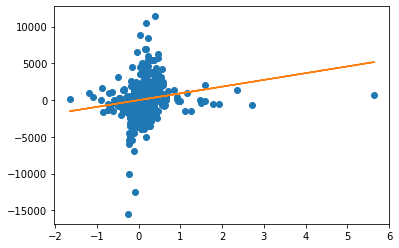

In [17]:
plt.plot(X_data,y_target,'o')
plt.plot(X_data,line_fitter.predict(X_data)) #예측해낸 값은 직선으로 - 동그라미 데이터들 간의 오차가 가장 적은 대표직선입니다라는 뜻
plt.show()

In [18]:
mse = mean_squared_error(y_test,y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('R2 결정계수 : {0:.3f}'.format(r2_score(y_test, y_predict)))
# 결정계수는 0~1값을 가지며, 1에 가까울수록 선형회귀 모델이 데이터에 대하여 높은 연관성을 가지고 있다고 해석

# mse와 rmse의 값은 크고 R2의 값은 작아 

MSE : 6756771.351 , RMSE : 2599.379
R2 결정계수 : 0.035


#### 아래는 교재 참고

In [18]:
X=kanal[['score']]
y=kanal['일일종가차이']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)
print('train data 개수 : ', len(X_train))
print('test data 개수 : ', len(X_test))

train data 개수 :  401
test data 개수 :  172


In [20]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [21]:
r_square = mlr.score(X_test, y_test)
print('r제곱 : ', r_square)
print('기울기 : ', mlr.coef_)
print('y절편 : ', mlr.intercept_)

r제곱 :  0.03102283185457666
기울기 :  [761.37527757]
y절편 :  -19.81475406500867


In [22]:
y_pred = mlr.predict(X)

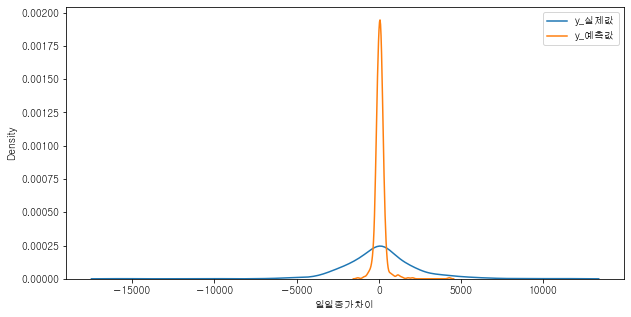

In [23]:
plt.figure(figsize=(10,5))
plt.rc('font', family='Gulim')
ax1=sns.kdeplot(y,label='y_실제값')
ax2=sns.kdeplot(y_pred, label='y_예측값',ax=ax1)
plt.legend()
plt.show()

# 다중회귀분석
#### 독립변수 : (1)Open, Volume, score - 3개 (2)Open, High, Low, Volume, score - 5개
#### 종속변수 : 일일종가차이
#### 감성점수가 독립변수와 상관성을 갖고 있는지 알아보기 위함

In [25]:
kanal

,Date,Open,High,Low,Close,Adj.Close,Volume,일일종가차이,score
0,2020-01-02,30800.0,30900,30400.0,30500.0,30473.498047,1205235,-200,1.600000
1,2020-01-03,30700.0,31000,30200.0,30500.0,30473.498047,1574240,0,-0.900000
2,2020-01-06,30100.0,31000,30000.0,30900.0,30873.152344,1968575,400,0.250000
3,2020-01-07,31000.0,32000,30900.0,32000.0,31972.195313,4200930,1100,-0.625000
4,2020-01-08,31700.0,32400,31300.0,31900.0,31872.283203,4258095,-100,-0.312500
...,...,...,...,...,...,...,...,...,...
568,2022-04-21,95100.0,95100,93100.0,93600.0,93600.000000,1809576,-1500,1.118156
569,2022-04-22,92200.0,92400,91400.0,92000.0,92000.000000,1553904,-1600,0.050633
570,2022-04-25,90400.0,91600,89600.0,89700.0,89700.000000,1511408,-2300,0.036517
571,2022-04-26,89800.0,91700,89700.0,90200.0,90200.000000,1368258,500,-0.094406


In [26]:
kanal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573 entries, 0 to 572
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       573 non-null    object 
 1   Open       573 non-null    float64
 2   High       573 non-null    int64  
 3   Low        573 non-null    float64
 4   Close      573 non-null    float64
 5   Adj.Close  573 non-null    float64
 6   Volume     573 non-null    int64  
 7   일일종가차이     573 non-null    int64  
 8   score      573 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 60.9+ KB


### (1)

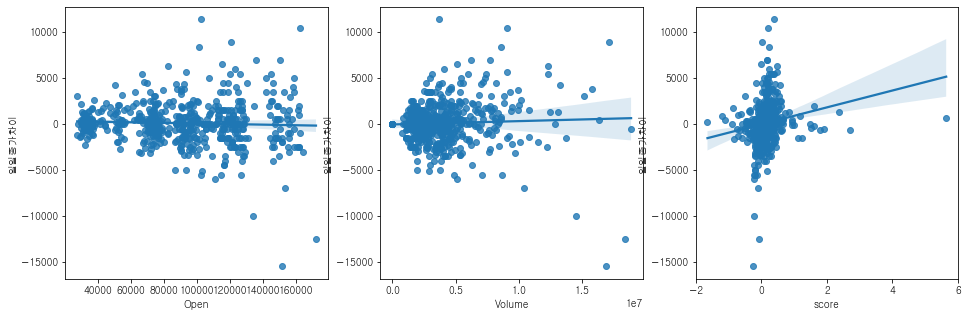

In [92]:
fig, axs = plt.subplots(figsize=(16,5) , ncols=3 , nrows=1)
lm_features = ['Open','Volume','score']
for i , feature in enumerate(lm_features):
    row = int(i/1)
    col = i%3
#     # regplot()을 이용해서 각 변수와 price에 대한 산점도와 선형회귀 직선을 표현
    sns.regplot(x=feature, y="일일종가차이", data=kanal, ax=axs[col])
# 시가와 거래량은 선이 일직선으로 보이나, 감성점수는 클 수록 일일종가차이도 커지는 것을 알 수 있음

In [93]:
y_target = kanal['일일종가차이']
# 타겟 제외하고 피처 데이터 세트 만들기
X_data = kanal[['Open','Volume', 'score']]

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

In [94]:
lr = LinearRegression()
lr.fit(X_train, y_train) # 학습
y_preds = lr.predict(X_test) # 테스트

# 평가
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds))) # r2 score는 여기서 계산

# mse, rmse값 너무 큼
# r2는 너무 작음

MSE : 6796961.990 , RMSE : 2607.098
Variance score : 0.029


In [95]:
print('절편값 :', lr.intercept_)
print('회귀계수값 : ', np.round(lr.coef_, 1))

절편값 : -206.7455639378921
회귀계수값 :  [ -0.    0.  811.3]


In [96]:
# 각각에 대한 회귀계수 값 확인
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)
# score가 가장 높다(=가중치가 높다)

score     811.3
Open       -0.0
Volume      0.0
dtype: float64

In [120]:
y_target = kanal['일일종가차이']
X_data = kanal[['Open','Volume','score']]
lr = LinearRegression()

# 5 fold 셋으로 neg_MSE를 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=500)

In [108]:
neg_mse_scores

array([-2055263.33876846, -6706279.98603278, -8699573.6180453 ])

In [121]:
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 500 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 500 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 500 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 500 folds 의 개별 Negative MSE scores:  [-1.97629791e+06 -1.19261154e+06 -7.19160500e+04 -9.43227600e+04
 -1.21768440e+05 -2.96019018e+06 -1.05670329e+06 -6.84563290e+05
 -1.72440402e+06 -5.14348100e+05 -1.46205982e+06 -3.64131530e+05
 -3.14957600e+05 -1.13687890e+05 -5.35140010e+05 -1.77179420e+05
 -3.69991650e+05 -5.24292320e+05 -1.15673940e+05 -8.76039870e+05
 -9.87172500e+04 -1.88671094e+06 -1.38749040e+05 -9.10025650e+05
 -5.94163720e+05 -3.82208866e+06 -3.05255859e+06 -7.02683173e+06
 -1.48400399e+06 -2.02323667e+06 -1.25742140e+05 -1.30780060e+06
 -2.01994800e+05 -2.10311416e+06 -1.27883480e+05 -9.02662510e+05
 -7.36179410e+05 -3.61859510e+05 -2.78276904e+06 -7.23589800e+04
 -1.88107730e+05 -2.90952198e+06 -2.68159280e+05 -1.11313729e+06
 -1.09992821e+06 -7.35493350e+05 -1.66478128e+06 -1.17713234e+06
 -5.53538542e+06 -2.90890707e+06 -4.19139450e+05 -3.40583972e+06
 -4.76099920e+05 -4.31960810e+05 -6.89110480e+05 -5.11696904e+06
 -1.61888505e+06 -1.45835640e+05 -1.55163282e+06 -1.

In [122]:
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

Variance score : 0.029


아래는 교재 참고

In [46]:
ndf = kanal[['Open','Volume','score','일일종가차이']]
X= ndf[['Open','Volume','score']]
y=ndf['일일종가차이']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=156)

In [48]:
print(X_train.shape)
print(X_test.shape)

(401, 3)
(172, 3)


In [49]:
lr = LinearRegression()

In [50]:
lr.fit(X_train, y_train)

LinearRegression()

In [51]:
r_square = lr.score(X_test, y_test)
print('결정계수 : ',r_square)
print('X 변수의 계수 기울기 : ', lr.coef_)
print('회귀식의 y절편 : ', lr.intercept_)

결정계수 :  0.02948101656562052
X 변수의 계수 기울기 :  [-7.97815277e-04  6.40486638e-05  8.11347333e+02]
회귀식의 y절편 :  -206.7455639378921


In [52]:
y_hat = lr.predict(X_test)

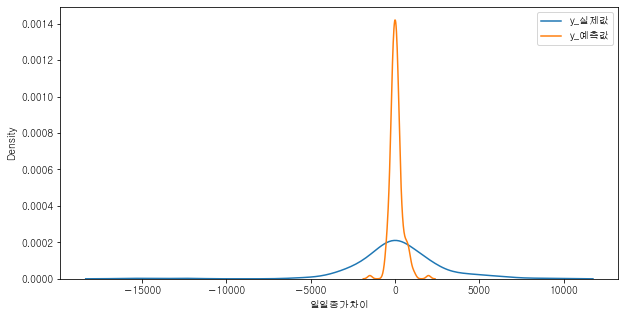

In [53]:
plt.figure(figsize=(10,5))
ax1=sns.kdeplot(y_test, label='y_실제값')
ax2=sns.kdeplot(y_hat, label='y_예측값',ax=ax1)
plt.legend()
plt.show()

### (2)

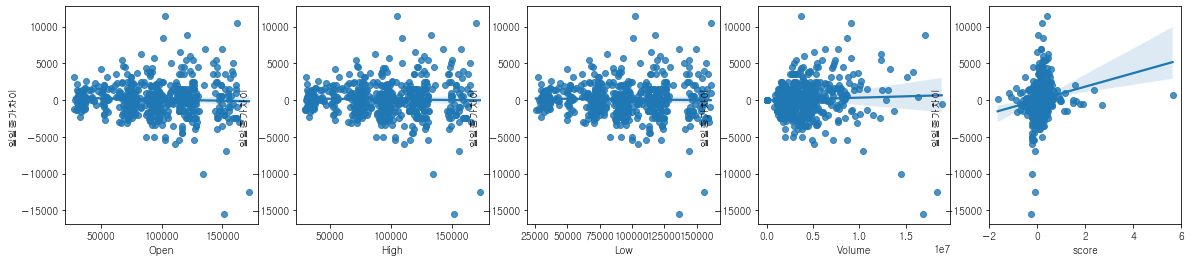

In [12]:
fig, axs = plt.subplots(figsize=(20,4) , ncols=5 , nrows=1)
lm_features = ['Open','High','Low', 'Volume','score']
for i , feature in enumerate(lm_features):
    row = int(i/1)
    col = i%5
    plt.rc('font', family='Gulim')
    sns.regplot(x=feature, y="일일종가차이", data=kanal, ax=axs[col])

In [9]:
y_target = kanal['일일종가차이']
# 타겟 제외하고 피처 데이터 세트 만들기
X_data = kanal[['Open','High','Low','Volume', 'score']]

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train) # 학습
y_preds = lr.predict(X_test) # 테스트

# 평가
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('결정계수 Variance score : {0:.3f}'.format(r2_score(y_test, y_preds))) # r2 score는 여기서 계산

# mse, rmse 수치가 그나마 작아졌고, r2도 1에 가까워 짐

MSE : 2071206.885 , RMSE : 1439.169
결정계수 Variance score : 0.704


In [194]:
print('절편값 :', lr.intercept_)
print('회귀계수값 : ', np.round(lr.coef_, 1))

절편값 : 186.7436122235024
회귀계수값 :  [ -1.5   0.8   0.7  -0.  443.3]


In [195]:
# 각각에 대한 회귀계수 값 확인
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)
# 여기도 score가 가장 높다(=가중치가 높다)

score     443.3
High        0.8
Low         0.7
Volume     -0.0
Open       -1.5
dtype: float64

In [208]:
y_target = kanal['일일종가차이']
X_data = kanal[['Open','Volume','score']]
lr = LinearRegression()

# 5 fold 셋으로 neg_MSE를 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)

In [34]:
neg_mse_scores

array([ -1639062.37989359,  -2512429.30165612,  -4631396.36865461,
       -14721355.48979076,  -5746402.91588515])

In [209]:
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
# 오히려 RMSE의 값이 더 커짐

 5 folds 의 개별 Negative MSE scores:  [ -1639062.38  -2512429.3   -4631396.37 -14721355.49  -5746402.92]
 5 folds 의 개별 RMSE scores :  [1280.26 1585.06 2152.07 3836.84 2397.17]
 5 folds 의 평균 RMSE : 2250.280 


아래는 교재 참고

In [32]:
ndf = kanal[['Open','Volume','score','일일종가차이','High','Low']]
X= ndf[['Open','Volume','score','High','Low']]
y=ndf['일일종가차이']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=156)

In [34]:
print(X_train.shape)
print(X_test.shape)

(401, 5)
(172, 5)


In [35]:
lr = LinearRegression()

In [36]:
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
r_square = lr.score(X_test, y_test)
print('결정계수 : ',r_square)
print('X 변수의 계수 기울기 : ', lr.coef_)
print('회귀식의 y절편 : ', lr.intercept_)

결정계수 :  0.7042582254465986
X 변수의 계수 기울기 :  [-1.53306655e+00 -2.18438545e-05  4.43278111e+02  7.88989668e-01
  7.41492011e-01]
회귀식의 y절편 :  186.74361213550696


In [38]:
y_hat = lr.predict(X_test)

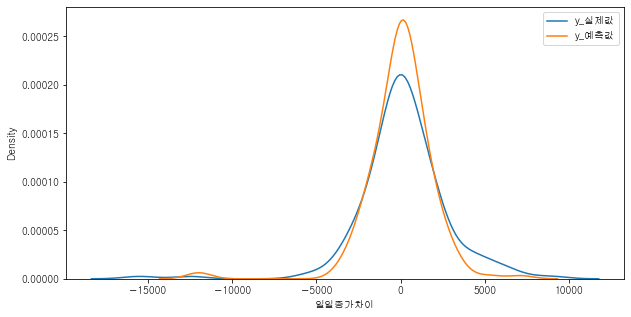

In [39]:
plt.figure(figsize=(10,5))
ax1=sns.kdeplot(y_test, label='y_실제값')
ax2=sns.kdeplot(y_hat, label='y_예측값',ax=ax1)
plt.legend()
plt.show()
# 모형간 오차가 비슷해졌다

In [218]:
# 아래부터는 유의미한 결과를 찾기 어려워, 발표때는 스킵하도록 하고, 이런 분석을 해봤다는 것에 의의를 둠.

# 다항회귀

X1 = kanal[['Open','Volume', 'score']]
y1 = kanal['일일종가차이']
X_train , X_test , y_train , y_test = train_test_split(X1, y1 ,test_size=0.3, random_state=156)

In [219]:
p_model = Pipeline([
    ('poly',PolynomialFeatures(degree=5)),
    ('linear',LinearRegression())
])

# pipeline에 data를 전달 해서 학습
p_model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('linear', LinearRegression())])

In [220]:
print('Polynomial 회귀 계수\n', np.round(p_model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [ 0. -0.  0. -0.  0.  0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0. -0.
  0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.
 -0.  0.  0.  0. -0. -0.  0. -0. -0.  0. -0.  0. -0. -0. -0.  0.  0. -0.
 -0. -0.]


In [221]:
### 학습된 회귀식을 이용해 예측/평가
y_preds = p_model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds))) #r2 score는 여기

MSE : 4070825.011 , RMSE : 2017.629
Variance score : 0.419


In [224]:
X_train_poly= PolynomialFeatures(degree=5, include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

((401, 55), (401, 3))

아래는 교재 참고

In [89]:
poly = PolynomialFeatures(degree=5)
X_train_poly=poly.fit_transform(X_train)

pr = LinearRegression()
pr.fit(X_train_poly, y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)
print(r_square)

0.41873840731358625


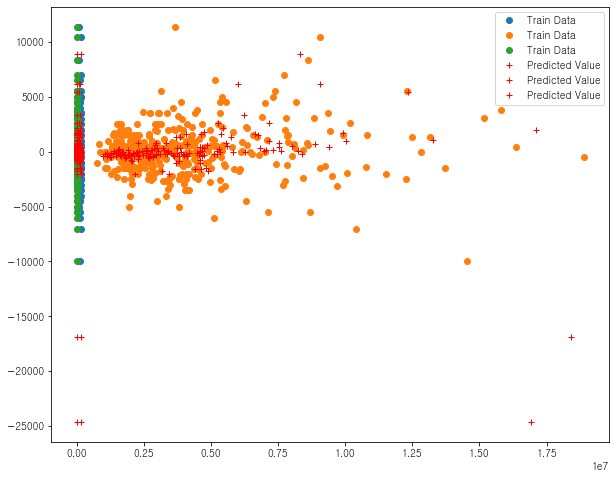

In [90]:
y_pred_test = pr.predict(X_test_poly)

fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
ax.plot(X_train, y_train, 'o', label='Train Data') # 데이터 분포
ax.plot(X_test, y_pred_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.show()
plt.close()

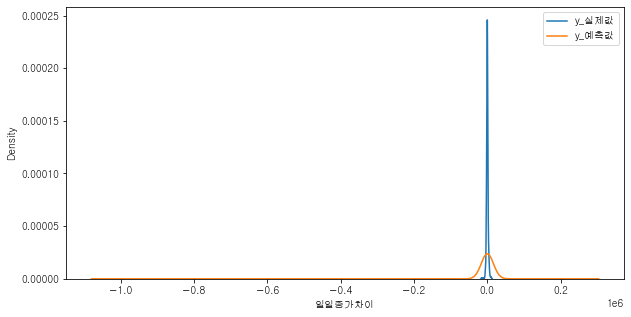

In [91]:
X_poly = poly.fit_transform(X1)
y_pred_test = pr.predict(X_poly)

plt.figure(figsize=(10,5))
ax1=sns.kdeplot(y, label='y_실제값')
ax2=sns.kdeplot(y_pred, label='y_예측값', ax=ax1)
plt.legend()
plt.show()

In [149]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [225]:
# 다항회귀 릿지
X1 = kanal[['Open','Volume', 'score']]
y1 = kanal['일일종가차이']

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X1, y1, scoring='neg_mean_squared_error', cv=5) # mse가 음수로 반환
rmse_scores = np.sqrt(-1*neg_mse_scores) #-1을 곱해줘서 mse를 양수로 반환해 rmse를 계산
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [ -1483679.211  -2530602.941  -4657095.981 -14758479.065  -5549208.07 ]
 5 folds 의 개별 RMSE scores :  [1218.064 1590.787 2158.031 3841.677 2355.676]
 5 folds 의 평균 RMSE : 2232.847 


In [232]:
# alpha 파라미터 값 정의
alphas = [1,10,100,1000,10000]

for alpha in alphas :
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=500) # mse가 음수로 반환
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)

    print('alpha {0} 일 때 500 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))
    

alpha 1 일 때 500 folds 의 평균 RMSE : 1658.575 
alpha 10 일 때 500 folds 의 평균 RMSE : 1657.195 
alpha 100 일 때 500 folds 의 평균 RMSE : 1656.851 
alpha 1000 일 때 500 folds 의 평균 RMSE : 1667.313 
alpha 10000 일 때 500 folds 의 평균 RMSE : 1672.179 


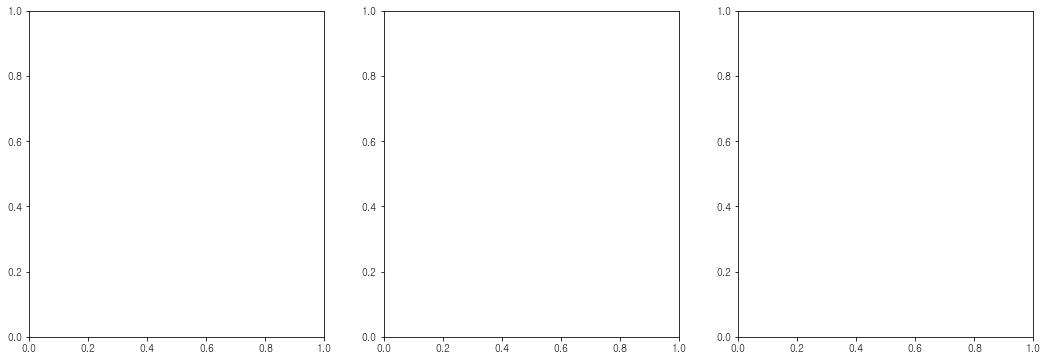

In [227]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=3)

In [233]:
# 각 alpha에 따른 회귀계수 값을 데이터로 저장하기 위한 df 생성
coeff_df = pd.DataFrame()

In [234]:
alphas

[1, 10, 100, 1000, 10000]

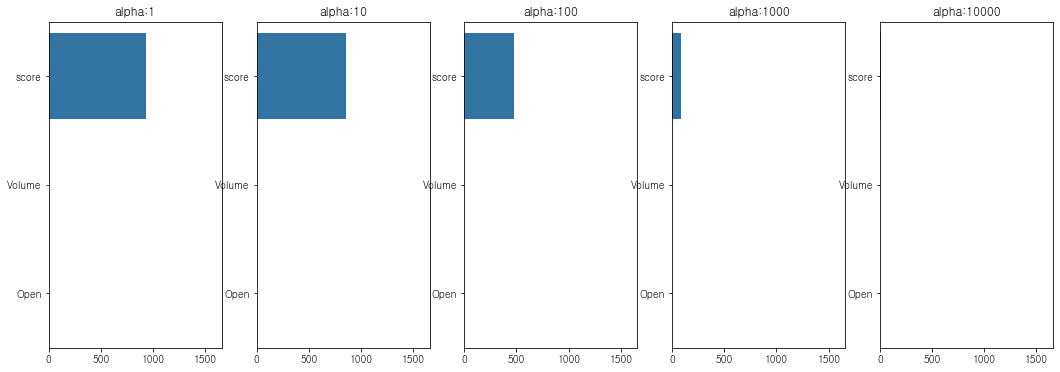

In [235]:
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)

for pos, alpha in enumerate(alphas) :
    ridge = Ridge(alpha=alpha) # 초기화
    ridge.fit(X_data, y_target) #학습
    
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 df의 컬럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index = X_data.columns)
    colname = 'alpha:'+ str(alpha)
    coeff_df[colname] = coeff
    
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 
    # 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(0,1660)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])
plt.show()
# 

In [236]:
# alpha값에 따른 컬럼별 회귀 계수 출력
coeff_df

,alpha:1,alpha:10,alpha:100,alpha:1000,alpha:10000
Open,-0.003005,-0.002995,-0.002944,-0.002892,-0.002881
Volume,0.000041,0.000041,0.000036,0.000032,0.000031
score,935.349975,861.189143,480.341845,88.585677,9.675385


In [175]:
from sklearn.linear_model import Lasso, ElasticNet

# 뒤에 ElasticNet에서도 사용할 수 있도록 함수로 작성
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고
# 회귀 계수값들을 DataFrame으로 반환하는 함수 생성

def get_linear_reg_eval(model_name,params=None,X_data_n=None,y_target_n=None,verbose=True) :
    coeff_df = pd.DataFrame() # 회귀계수를 저장할 빈 df 생성
    if verbose : print('####### ', model_name , '#######') # Log 출력
    print(params)    
    for param in params : # alpha값 변화
        # 모델별 해당 클래스 객체 생성
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
            
        # 교차 검증 수행
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 500)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data, y_target_n)
        
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
        coeff = pd.Series(data=model.coef_ , index=X_data.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
        
    return coeff_df
        

In [180]:
lasso_alphas = [ 0.1, 1, 5, 50,100]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
[0.1, 1, 5, 50, 100]
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 1658.758 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1658.691 
alpha 5일 때 5 폴드 세트의 평균 RMSE: 1658.399 
alpha 50일 때 5 폴드 세트의 평균 RMSE: 1657.109 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 1659.785 


In [181]:
# alpha 값에 따른 피처별 회귀 계수
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
coeff_lasso_df

,alpha:0.1,alpha:1,alpha:5,alpha:50,alpha:100
Open,-0.003006,-0.003005,-0.003003,-0.002969,-0.002932
Volume,0.000042,0.000041,0.000041,0.000038,0.000035
score,943.832560,938.850532,916.708185,667.606769,390.827449
